# Trabajo practico 1

### Punto 1

Utilizando Matlab, Octave o Python implementar un **Generador Congruencial Lineal** (GCL) de módulo 232, multiplicador 1013904223, incremento de 1664525 y semilla igual a la parte entera del promedio de los números de padrón de los integrantes del grupo.

a) Informar los primeros 10 números generados.

b) Modificar el GCL para que devuelva números al azar entre 0 y 1.

c) Realizar un histograma mostrando 100.000 valores generados en el punto b.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def gcl(seed = 10, iterations = 10, multiplier = 1013904223, addition = 1664525, module = 232, normalize = False):
  results = []
  x = seed
  for _ in range(iterations):
    ecuation = (multiplier * x + addition) % module
    x = ecuation / module if normalize else ecuation
    results.append(x)

  return results

gcl()

[211, 90, 179, 10, 211, 90, 179, 10, 211, 90]

In [3]:
# b
gcl(normalize=True)

[0.9094827586206896,
 0.09789313324566545,
 0.768105525459195,
 0.4524685853514178,
 0.6485458553351205,
 0.5971268353791073,
 0.2459375113248825,
 0.6824414167424728,
 0.5835573108031832,
 0.6671804780590123]

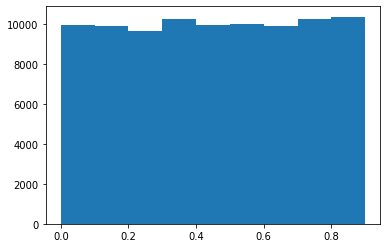

In [4]:
# c
def gcl_with_histogram(seed=10, iterations=10, multiplier=1013904223, addition=1664525, module=232, normalize=False):
  results = gcl(seed, iterations, multiplier, addition, module, normalize)
  bins = [ bin / 10 for bin in range(10) ]
  plt.hist(results, bins)
  plt.show()

gcl_with_histogram(iterations = 100000, normalize = True)

### Punto 2

Para la siguiente función de densidad de probabilidad se pide:

![image](https://user-images.githubusercontent.com/23021528/64925793-3391bc80-d7cc-11e9-9d24-59b28160bfd1.png)

a) Graficar la función de densidad de probabilidad.

b) Calcular y graficar la función de probabilidad acumulada y su inversa.

c) Utilizando el generador de números aleatorios con distribución uniforme [0,1] implementado en el ejercicio 1 y aplicando el método de la transformada inversa genere 100.000 números pseudoaleatorios.

d) Realizar un histograma con los valores obtenidos en el punto anterior

In [5]:
_lambda = 1 / 15

def x_values(start, end, step):
    return [step * x_ for x_ in range(start, 1 + int(end / step))]


def y_values(x_values_, function):
    return [function(x_) for x_ in x_values_]

x = x_values(start=0, end=250, step=0.5)

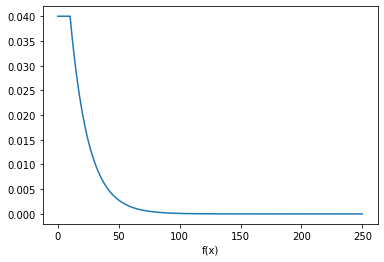

In [6]:
#a
def generate_f(lambda_):
    def f_(t):
        if 0 <= t < 10:
            return 1 / 25
        elif 10 <= t:
            return (3 / 5) * lambda_ * np.exp(lambda_ * (10 - t))
        else:
            raise Exception('f: t has to be positive or zero')

    return f_


plt.plot(x, y_values(x, function=generate_f(_lambda)))
plt.xlabel('f(x)')
plt.show()

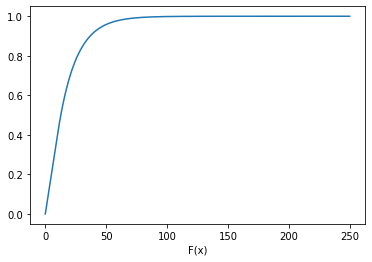

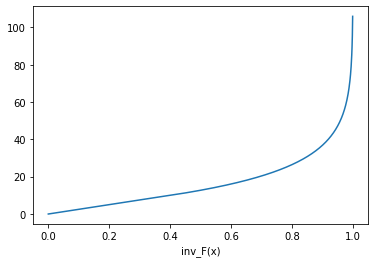

In [7]:
#b
def generate_F(lambda_):
    def F_(t):
        if 0 <= t < 10:
            return (1 / 25) * t
        elif 10 <= t:
            return -3 / 5 * np.exp(lambda_ * (10 - t)) + (10 / 25 + 3 / 5)
        else:
            raise Exception('F: t has to be positive or zero')

    return F_


def generate_inv_F(lambda_):
    def inv_F_(t):
        if 0 <= t < 10 / 25:
            return 25 * t
        elif 10 / 25 <= t <= 1:
            return 10 - (1 / lambda_) * np.log((5 / 3) * ((10 / 25) + (3 / 5) - t))
        else:
            raise Exception('inv_F: t has to be between 0 and 1')

    return inv_F_

plt.plot(x, y_values(x, function=generate_F(_lambda)))
plt.xlabel('F(x)')
plt.show()

x = x_values(start=0, end=0.999, step=0.001)

plt.plot(x, y_values(x, function=generate_inv_F(_lambda)))
plt.xlabel('inv_F(x)')
plt.show()

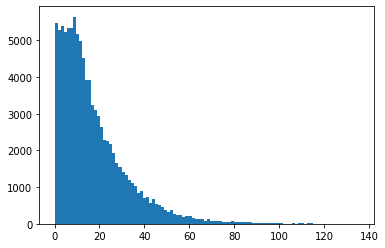

In [8]:
#c, d
sample_count = 100000
inv_F = generate_inv_F(_lambda)
f_random_samples = [inv_F(random) for random in gcl(normalize=True, iterations=sample_count)]
plt.hist(f_random_samples, bins=100)
plt.show()

### Punto 3

Aplicando el algoritmo de Aceptación y rechazo se pide:

* Generar 100.000 número aleatorios con distribución Normal de media 15 y desvío estándar 3 .
* Realizar un histograma de frecuencias relativas con todos los valores obtenidos.
* Comparar, en el mismo gráfico, el histograma realizado en el punto anterior con la función de densidad de probabilidad brindada por Matlab, Octave o Python (para esta última distribución utilizar un gráfico de línea).
* Calcular la media y la varianza de la distribución obtenida y compararlos con los valores teóricos.
* Calcule el factor de rendimiento del método.

In [3]:
from math import sqrt, exp, pi
import numpy as np
from numpy.random import exponential, rand, normal
import matplotlib.pyplot as plt
from time import time


def normal_distribution(x, mu, sigma):
    exponent = (-1) * (x - mu) ** 2 / (2 * (sigma ** 2))
    scalar = 1/(sigma * sqrt(2 * pi))
    return scalar * exp(exponent)


def exponential_distribution(y, _lambda):
    return _lambda * exp((-1) * _lambda * y)


def c_value(mu, sigma, _lambda):
    t = sigma ** 2 * _lambda
    f_x_t = normal_distribution(t, mu, sigma)
    f_y_t = exponential_distribution(t, _lambda)
    return f_x_t/f_y_t


def generate_normal(mu, sigma, _lambda, n):
    # generlo la normal en cero y luego la muevo en mu posiciones
    samples = exponential(1 / _lambda, n)
    c = c_value(mu, sigma, _lambda)
    f_x = lambda x: normal_distribution(x, 0, sigma)
    f_y = lambda x: exponential_distribution(x, _lambda)
    p = [f_x(t)/(c * f_y(t)) for t in samples]
    z = []
    percentage_of_rejections = 0
    total = 0
    i = 0
    while i < n:
        if rand() >= p[i]:
            percentage_of_rejections += 1
            total += 1
            continue
        if rand() < 0.5:
            z.append(samples[i])
        else:
            z.append((-1)*samples[i])
        total += 1
        i += 1
    percentage_of_rejections = percentage_of_rejections / total
    z = [_z+mu for _z in z]
    return z, percentage_of_rejections


def map_relative_frequencies(values):
    size = len(values)
    freq = {}
    for val in values:
        if val in freq:
            freq[val] += 1
        else:
            freq[val] = 0
    return list(map(lambda x: float(x/size), freq.values()))


def relative_frequency_histogram(plt, values):
    return plt.hist(values, histtype='barstacked', density=True)


def graph_normal_density_function(plt, mu, sigma, n):
    x = normal(loc=mu, scale=sigma, size=n)
    x.sort()
    y = [normal_distribution(t, mu, sigma) for t in x]
    label = 'normal'
    plt.plot(x, y, color='C2', label=label, ls='--')
    plt.legend(loc='upper right')

In [4]:
mu = 15
sigma = 3
variance = sigma**2
_lambda = 0.5
n = 100000

In [5]:
#a
normal_values, percentage_of_rejections = generate_normal(mu, sigma, _lambda, n)

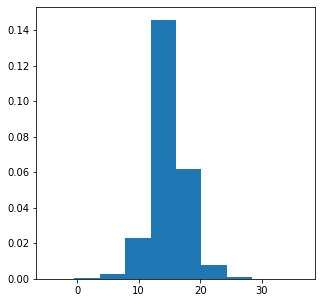

In [6]:
#b
plt.figure(figsize=(5, 5))
relative_frequency_histogram(plt, normal_values)
plt.show()

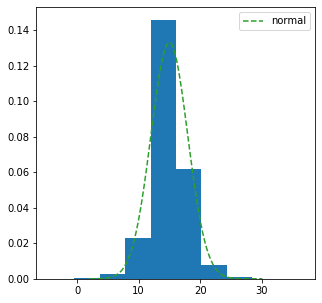

In [7]:
#c
plt.figure(figsize=(5, 5))
relative_frequency_histogram(plt, normal_values)
graph_normal_density_function(plt, mu, sigma, n)
plt.show()

In [8]:
#d
actual_mean = np.mean(normal_values)
mean_error = abs(mu - actual_mean)
print(f"mu: {actual_mean} - error: {mean_error}")
actual_variance = np.std(normal_values, ddof=1)**2
variance_error = abs(variance - actual_variance)
print(f"actual sigma: {actual_variance} - error: {variance_error}")

mu: 14.990305794109343 - error: 0.00969420589065706
actual sigma: 7.9407718846460655 - error: 1.0592281153539345


In [9]:
#e
print(f"percentage_of_rejections: {percentage_of_rejections}")

percentage_of_rejections: 0.7225620836697269
